In [1]:
import os
import shutil
from glob import glob

### Step 1: Reorganize Detection Dataset

In [ ]:
def restructure_yolo_dataset(base_path='dataset/Detection'):
    for split in ['train', 'test']:
        img_dir = os.path.join(base_path, split, 'images')
        lbl_dir = os.path.join(base_path, split, 'labels')
        os.makedirs(img_dir, exist_ok=True)
        os.makedirs(lbl_dir, exist_ok=True)

        for class_folder in os.listdir(os.path.join(base_path, split)):
            if class_folder in ['images', 'labels']: continue
            class_path = os.path.join(base_path, split, class_folder)
            for file in os.listdir(class_path):
                src = os.path.join(class_path, file)
                if file.endswith('.jpg'):
                    dst = os.path.join(img_dir, file)
                elif file.endswith('.txt'):
                    dst = os.path.join(lbl_dir, file)
                shutil.copy(src, dst)

restructure_yolo_dataset()

### Train the YOLOv8 model:

In [2]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')  # or yolov8n.pt for faster training

model.train(
    data='dataset/Detection/data.yaml',
    imgsz=128,         # 416 is a safe size for 6 GB VRAM
    batch=4,           # try 8, reduce if you hit OOM
    epochs=20,        # you can go up to 300 if improving
    cache=True,        # loads data into RAM (13 GB is good!)
    device=0           # ensure using GPU
)

New https://pypi.org/project/ultralytics/8.3.152 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.145 🚀 Python-3.10.12 torch-2.7.0+cu126 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 6144MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/Detection/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=128, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train7, nbs=64, nms=False, opset=None, o

train: Scanning /mnt/h/Study/Academic/Part 4/Project/Riya/BdSL/dataset/Detection/train/labels.cache... 11768 images, 6 backgrounds, 0 corrupt: 100%|██████████| 11774/11774 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.4GB RAM): 100%|██████████| 11774/11774 [05:05<00:00, 38.56it/s]


val: Fast image access ✅ (ping: 22.0±15.7 ms, read: 9.9±8.4 MB/s, size: 790.6 KB)


val: Scanning /mnt/h/Study/Academic/Part 4/Project/Riya/BdSL/dataset/Detection/test/labels.cache... 2939 images, 1 backgrounds, 0 corrupt: 100%|██████████| 2940/2940 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.1GB RAM): 100%|██████████| 2940/2940 [02:00<00:00, 24.30it/s]


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000189, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to runs/detect/train7
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      0.33G      2.007      3.841      1.444          6        128: 100%|██████████| 2944/2944 [03:16<00:00, 14.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 368/368 [00:28<00:00, 12.92it/s]


                   all       2940       2939      0.365      0.539      0.432      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20     0.416G      1.365      2.144      1.144          2        128: 100%|██████████| 2944/2944 [02:54<00:00, 16.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 368/368 [00:21<00:00, 16.97it/s]


                   all       2940       2939      0.591      0.688      0.697      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20     0.416G      1.232      1.734      1.093          2        128: 100%|██████████| 2944/2944 [02:53<00:00, 17.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 368/368 [00:22<00:00, 16.15it/s]

                   all       2940       2939      0.725       0.72      0.782      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20     0.486G      1.163      1.521      1.072          5        128: 100%|██████████| 2944/2944 [02:52<00:00, 17.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 368/368 [00:21<00:00, 16.84it/s]

                   all       2940       2939      0.756       0.79      0.823      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20     0.486G       1.12      1.384      1.057          6        128: 100%|██████████| 2944/2944 [02:54<00:00, 16.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 368/368 [00:20<00:00, 17.94it/s]


                   all       2940       2939      0.825      0.805       0.86      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20     0.486G      1.092      1.301      1.044          7        128: 100%|██████████| 2944/2944 [02:53<00:00, 17.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 368/368 [00:22<00:00, 16.64it/s]

                   all       2940       2939      0.831      0.825      0.879      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20     0.486G       1.06      1.237      1.031          2        128: 100%|██████████| 2944/2944 [02:46<00:00, 17.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 368/368 [00:22<00:00, 16.67it/s]

                   all       2940       2939       0.82      0.846      0.885      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20     0.486G      1.046      1.185      1.028          4        128: 100%|██████████| 2944/2944 [02:46<00:00, 17.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 368/368 [00:22<00:00, 16.33it/s]

                   all       2940       2939       0.84      0.842      0.891      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20     0.486G      1.019       1.13      1.018          5        128: 100%|██████████| 2944/2944 [02:48<00:00, 17.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 368/368 [00:20<00:00, 18.01it/s]

                   all       2940       2939      0.862      0.878      0.912       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20     0.486G      1.009      1.108      1.013          3        128: 100%|██████████| 2944/2944 [02:40<00:00, 18.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 368/368 [00:20<00:00, 17.91it/s]

                   all       2940       2939      0.858      0.869      0.905       0.71


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20     0.486G     0.8432     0.7102      0.955          2        128: 100%|██████████| 2944/2944 [02:48<00:00, 17.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 368/368 [00:23<00:00, 15.62it/s]

                   all       2940       2939      0.875      0.869      0.921       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20     0.486G     0.8161     0.6578      0.941          2        128: 100%|██████████| 2944/2944 [02:46<00:00, 17.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 368/368 [00:20<00:00, 17.86it/s]

                   all       2940       2939      0.882      0.879      0.921      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20     0.486G     0.8021     0.6389     0.9345          2        128: 100%|██████████| 2944/2944 [02:46<00:00, 17.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 368/368 [00:22<00:00, 16.36it/s]


                   all       2940       2939      0.885      0.882      0.926      0.738

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20     0.486G     0.7863     0.6076     0.9271          2        128: 100%|██████████| 2944/2944 [02:46<00:00, 17.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 368/368 [00:21<00:00, 17.44it/s]

                   all       2940       2939      0.883      0.886       0.93       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20     0.486G     0.7766     0.5919     0.9256          2        128: 100%|██████████| 2944/2944 [02:42<00:00, 18.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 368/368 [00:20<00:00, 18.29it/s]

                   all       2940       2939      0.898      0.882       0.93      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20     0.486G     0.7614     0.5722     0.9187          2        128: 100%|██████████| 2944/2944 [02:41<00:00, 18.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 368/368 [00:19<00:00, 18.43it/s]

                   all       2940       2939      0.899      0.881      0.933      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20     0.506G     0.7496     0.5586     0.9143          2        128: 100%|██████████| 2944/2944 [02:44<00:00, 17.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 368/368 [00:20<00:00, 17.90it/s]

                   all       2940       2939      0.913      0.886      0.939      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20     0.506G     0.7497     0.5431     0.9116          2        128: 100%|██████████| 2944/2944 [02:46<00:00, 17.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 368/368 [00:22<00:00, 16.61it/s]


                   all       2940       2939      0.899      0.897      0.938      0.756

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20     0.506G     0.7296      0.528     0.9057          2        128: 100%|██████████| 2944/2944 [02:47<00:00, 17.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 368/368 [00:22<00:00, 16.20it/s]

                   all       2940       2939      0.902      0.901       0.94      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20     0.506G     0.7238     0.5147      0.904          2        128: 100%|██████████| 2944/2944 [02:46<00:00, 17.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 368/368 [00:26<00:00, 13.96it/s]

                   all       2940       2939      0.908        0.9      0.942      0.762



20 epochs completed in 1.068 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 22.5MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics 8.3.145 🚀 Python-3.10.12 torch-2.7.0+cu126 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 6144MiB)
Model summary (fused): 72 layers, 11,144,547 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 368/368 [00:19<00:00, 18.93it/s]


                   all       2940       2939      0.908      0.899      0.942      0.762
                     1         60         60      0.755      0.933      0.887      0.732
                     2         60         60      0.953          1      0.993      0.815
                     3         60         60      0.942      0.967      0.984      0.864
                     4         60         60      0.744      0.917      0.873      0.763
                     5         60         60      0.714        0.9      0.916      0.805
                     6         60         60      0.888      0.922      0.951      0.788
                     7         60         60      0.946      0.882      0.961      0.839
                     8         60         60          1      0.977      0.995      0.804
                     9         60         60      0.981      0.933      0.985      0.787
                    10         60         60      0.943      0.883      0.932      0.787
                    1

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b2bdbf07400>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.0340

### PART 2: Recognition with TensorFlow CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ConvNeXtBase
from tensorflow.keras.applications.convnext import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

img_size = 224  # ConvNeXt requires at least 224x224
batch_size = 2
epochs = 25

train_dir = 'dataset/Recognition/train'
test_dir = 'dataset/Recognition/test'

# 1. Data Generators
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.25)
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Validation generator (15% of train_dir)
val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# 2. Load ConvNeXt base (without top)
base_model = ConvNeXtBase(include_top=False, weights='imagenet', input_shape=(img_size, img_size, 3))

# Freeze base model for feature extraction
base_model.trainable = False

print(f"Number of Classes {train_gen.num_classes}")

# Add custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=outputs)

# 3. Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. Callbacks
callbacks = [
    ModelCheckpoint('bestModels/best_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1)
]

# 5. Train only the head
model.fit(train_gen, epochs=epochs, validation_data=val_gen, callbacks=callbacks)

# 6. Fine-tune the whole model
#base_model.trainable = True
#model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
#model.fit(train_gen, epochs=5, validation_data=val_gen, callbacks=callbacks)

# 7. Final evaluation on the test set
loss, accuracy = model.evaluate(test_gen)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# 8. Save final model
model.save(f"models/recognition_model_convnext - Test Loss {loss:.4f} - Test Accuracy {accuracy:.4f}.keras")

2025-06-13 02:38:17.313773: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749760699.472395   43505 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749760699.784270   43505 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749760702.123510   43505 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749760702.123547   43505 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749760702.123549   43505 computation_placer.cc:177] computation placer alr

Found 8835 images belonging to 49 classes.
Found 2939 images belonging to 49 classes.
Found 2940 images belonging to 49 classes.


I0000 00:00:1749760749.871501   43505 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4080 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1660 Ti, pci bus id: 0000:10:00.0, compute capability: 7.5


Number of Classes 49


/mnt/h/Study/Academic/Part 4/Project/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25


I0000 00:00:1749760768.946038   43926 service.cc:152] XLA service 0x731e2c011d10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749760768.946083   43926 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2025-06-13 02:39:29.878812: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1749760772.925158   43926 cuda_dnn.cc:529] Loaded cuDNN version 90501


   1/4418 ━━━━━━━━━━━━━━━━━━━━ 25:42:53 21s/step - accuracy: 0.0000e+00 - loss: 3.9906

I0000 00:00:1749760781.004217   43926 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4418/4418 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4156 - loss: 2.0799
Epoch 1: val_accuracy improved from -inf to 0.66791, saving model to bestModels/best_model.keras
4418/4418 ━━━━━━━━━━━━━━━━━━━━ 310s 65ms/step - accuracy: 0.4157 - loss: 2.0797 - val_accuracy: 0.6679 - val_loss: 0.9597 - learning_rate: 0.0010
Epoch 2/25
4417/4418 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8339 - loss: 0.4729
Epoch 2: val_accuracy improved from 0.66791 to 0.70908, saving model to bestModels/best_model.keras
4418/4418 ━━━━━━━━━━━━━━━━━━━━ 171s 39ms/step - accuracy: 0.8339 - loss: 0.4729 - val_accuracy: 0.7091 - val_loss: 0.8610 - learning_rate: 0.0010
Epoch 3/25
4418/4418 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9029 - loss: 0.2777
Epoch 3: val_accuracy improved from 0.70908 to 0.73154, saving model to bestModels/best_model.keras
4418/4418 ━━━━━━━━━━━━━━━━━━━━ 171s 39ms/step - accuracy: 0.9029 - loss: 0.2777 - val_accuracy: 0.7315 - val_loss: 0.8438 - learning_rate: 0.0010
Epoch 4/2

### Second approach on ConvNeXt

Found 8247 images belonging to 49 classes.
Found 3527 images belonging to 49 classes.
Found 2940 images belonging to 49 classes.

350926856/350926856 ━━━━━━━━━━━━━━━━━━━━ 39s 0us/step
Number of Classes: 49


c:\Users\Israk\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.1468 - loss: 7.7046
Epoch 1: val_accuracy improved from -inf to 0.43351, saving model to bestModels/best_model.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 4287s 8s/step - accuracy: 0.1470 - loss: 7.6997 - val_accuracy: 0.4335 - val_loss: 2.8564 - learning_rate: 9.9606e-04
Epoch 2/25
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.4101 - loss: 2.8865
Epoch 2: val_accuracy improved from 0.43351 to 0.49589, saving model to bestModels/best_model.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 4161s 8s/step - accuracy: 0.4101 - loss: 2.8863 - val_accuracy: 0.4959 - val_loss: 2.4626 - learning_rate: 9.8429e-04
Epoch 3/25
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.4313 - loss: 2.6120
Epoch 3: val_accuracy improved from 0.49589 to 0.51659, saving model to bestModels/best_model.keras
516/516 ━━━━━━━━━━━━━━━━━━━━ 4182s 8s/step - accuracy: 0.4314 - loss: 2.6119 - val_accuracy: 0.5166 - val_loss: 2.3432 - learning_rate: 9.6489e-04
Epoch 4

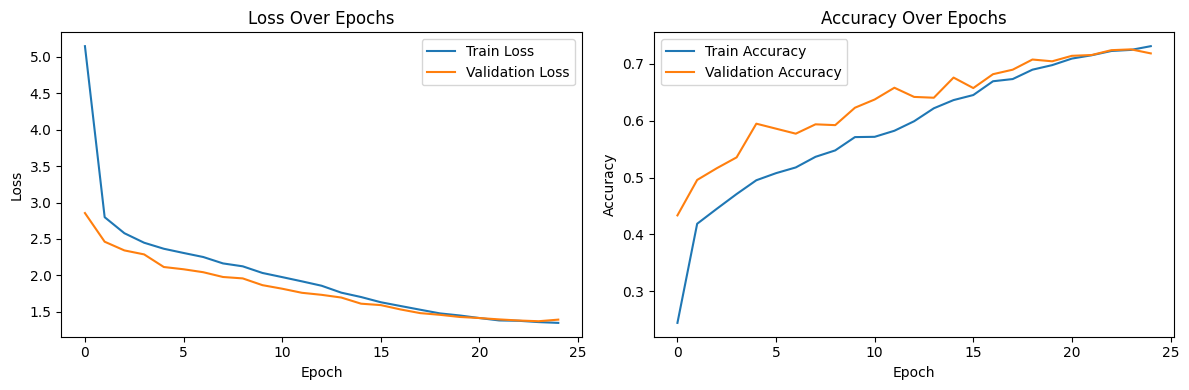

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ConvNeXtBase
from tensorflow.keras.applications.convnext import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import matplotlib.pyplot as plt

# Configuration
img_size = 224  # ConvNeXt requires at least 224x224
batch_size = 16  # Increased for stable gradients
epochs = 25
train_dir = 'dataset/Recognition/train'
test_dir = 'dataset/Recognition/test'

# 1. Data Generators with Augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.3,  # Increased validation split
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# 2. Compute Class Weights for Imbalanced Classes
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_gen.classes),
    y=train_gen.classes
)
class_weight_dict = dict(enumerate(class_weights))

# 3. Load ConvNeXt base (without top)
base_model = ConvNeXtBase(include_top=False, weights='imagenet', input_shape=(img_size, img_size, 3))

# Freeze base model initially for feature extraction
base_model.trainable = False

print(f"Number of Classes: {train_gen.num_classes}")

# 4. Add Enhanced Custom Head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = Dropout(0.3)(x)
outputs = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=outputs)

# 5. Compile with Cosine Decay Learning Rate
lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-3,
    decay_steps=epochs * len(train_gen),
    alpha=1e-6
)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 6. Callbacks
callbacks = [
    ModelCheckpoint('bestModels/best_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1),
    EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
]

# 7. Train the Head
history = model.fit(
    train_gen,
    epochs=epochs,
    validation_data=val_gen,
    callbacks=callbacks,
    class_weight=class_weight_dict
)

# 8. Fine-Tune the Model
base_model.trainable = True
for layer in base_model.layers[:100]:  # Freeze earlier layers
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(
    train_gen,
    epochs=10,  # Additional epochs for fine-tuning
    validation_data=val_gen,
    callbacks=callbacks,
    class_weight=class_weight_dict
)

# 9. Final Evaluation on Test Set
loss, accuracy = model.evaluate(test_gen)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# 10. Save Final Model
model.save(f"models/recognition_model_convnext - Test Loss {loss:.4f} - Test Accuracy {accuracy:.4f}.keras")

# 11. Plot Training/Validation Loss and Accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('training_plots.png')
plt.show()

184/184 ━━━━━━━━━━━━━━━━━━━━ 1080s 6s/step


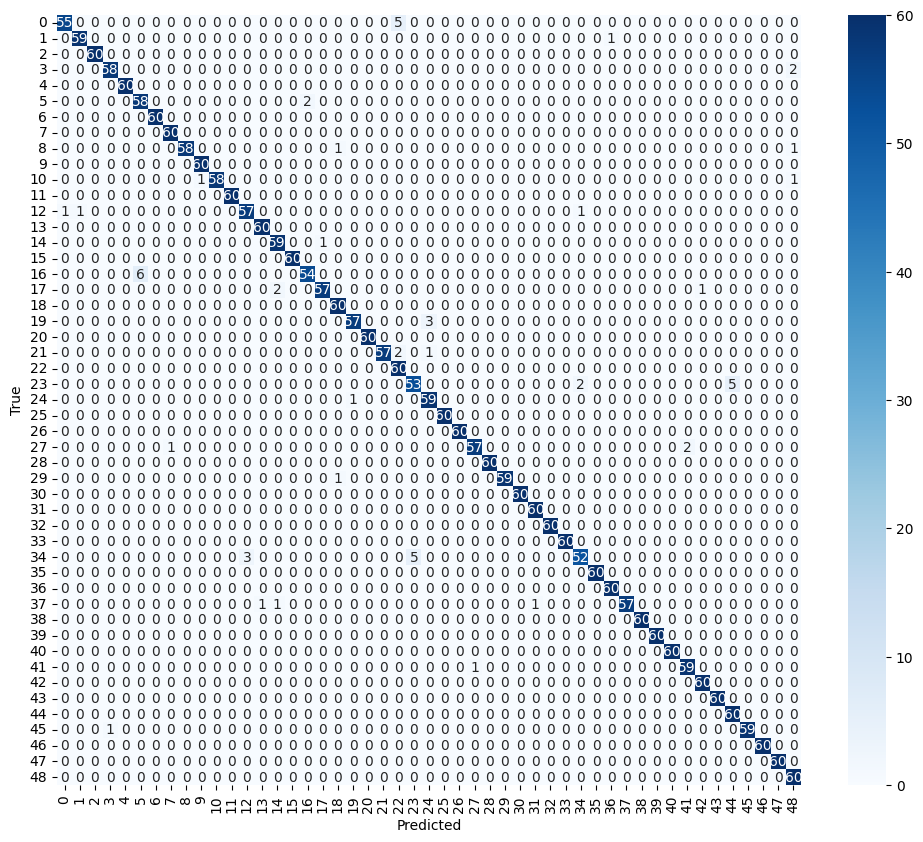

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = model.predict(test_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_gen.classes
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix.png')
plt.show()

In [4]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
with open('convNextmodel.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Israk\AppData\Local\Temp\tmphxjyfgb0\assets


INFO:tensorflow:Assets written to: C:\Users\Israk\AppData\Local\Temp\tmphxjyfgb0\assets


Saved artifact at 'C:\Users\Israk\AppData\Local\Temp\tmphxjyfgb0'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 49), dtype=tf.float32, name=None)
Captures:
  2463132808016: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  2463132807824: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  2463132808592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2463132810128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2463132809168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2463132809936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2463132810320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2463132810896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2463132809552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2463132809360: TensorSpec(shape=(), dtype=tf.resource,

### Training on MobileNetV2

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

img_size = 224
batch_size = 3
epochs = 30

train_dir = 'dataset/Recognition/train'
test_dir = 'dataset/Recognition/test'

# 1. Data Generators
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.25)
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# 2. Load MobileNetV2 base model
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(img_size, img_size, 3))

# Freeze base model for phase 1
base_model.trainable = False

print(f"Number of Classes: {train_gen.num_classes}")

# 3. Add custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=outputs)

# 4. Compile model for Phase 1
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Phase 1 callbacks
callbacks_phase1 = [
    ModelCheckpoint('bestModels/best_model_mobilenetv2.keras', monitor='val_accuracy', save_best_only=True, verbose=1),
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1)
]

# Phase 1 Training
print("🔧 Phase 1: Training the top layers...")
model.fit(train_gen, epochs=epochs, validation_data=val_gen, callbacks=callbacks_phase1)

# Phase 2 callbacks (fine-tuning) with higher patience
callbacks_phase2 = [
    ModelCheckpoint('bestModels/fine_tuned_model_mobilenetv2.keras', monitor='val_accuracy', save_best_only=True, verbose=1),
    EarlyStopping(monitor='val_loss', patience=9, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=1e-6, verbose=1)
]

# Phase 2 Fine-tuning
print("🧠 Phase 2: Fine-tuning the whole model...")
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_gen, epochs=5, validation_data=val_gen, callbacks=callbacks_phase2)


# 8. Final evaluation on the test set
loss, accuracy = model.evaluate(test_gen)
print(f"📊 Test Loss: {loss:.4f}")
print(f"✅ Test Accuracy: {accuracy:.4f}")

# 9. Save the final model
model.save(f"models/recognition_model_mobilenetv2 - Test Loss {loss:.4f} - Test Accuracy {accuracy:.4f}.keras")


2025-06-13 13:48:17.119463: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749800898.982314     758 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749800899.294709     758 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749800901.762691     758 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749800901.762725     758 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749800901.762727     758 computation_placer.cc:177] computation placer alr

Found 8835 images belonging to 49 classes.
Found 2939 images belonging to 49 classes.
Found 2940 images belonging to 49 classes.


I0000 00:00:1749800976.830590     758 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4080 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1660 Ti, pci bus id: 0000:10:00.0, compute capability: 7.5


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Number of Classes: 49
🔧 Phase 1: Training the top layers...


/mnt/h/Study/Academic/Part 4/Project/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


I0000 00:00:1749800990.535136    5620 service.cc:152] XLA service 0x783180011900 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749800990.535183    5620 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2025-06-13 13:49:51.303088: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1749800993.252953    5620 cuda_dnn.cc:529] Loaded cuDNN version 90501


   3/2945 ━━━━━━━━━━━━━━━━━━━━ 3:02 62ms/step - accuracy: 0.0000e+00 - loss: 4.9244   

I0000 00:00:1749801000.929658    5620 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2945/2945 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.2542 - loss: 2.8014
Epoch 1: val_accuracy improved from -inf to 0.53181, saving model to bestModels/best_model_mobilenetv2.keras
2945/2945 ━━━━━━━━━━━━━━━━━━━━ 1440s 485ms/step - accuracy: 0.2543 - loss: 2.8011 - val_accuracy: 0.5318 - val_loss: 1.4300 - learning_rate: 0.0010
Epoch 2/30
2945/2945 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6413 - loss: 1.0956
Epoch 2: val_accuracy improved from 0.53181 to 0.57196, saving model to bestModels/best_model_mobilenetv2.keras
2945/2945 ━━━━━━━━━━━━━━━━━━━━ 95s 32ms/step - accuracy: 0.6413 - loss: 1.0956 - val_accuracy: 0.5720 - val_loss: 1.3082 - learning_rate: 0.0010
Epoch 3/30
2945/2945 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.7148 - loss: 0.8681
Epoch 3: val_accuracy improved from 0.57196 to 0.58727, saving model to bestModels/best_model_mobilenetv2.keras
2945/2945 ━━━━━━━━━━━━━━━━━━━━ 553s 188ms/step - accuracy: 0.7148 - loss: 0.8681 - val_accuracy: 0.5873 - val_loss: 

### Predict on Test Data

In [2]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report

#recognition_model = load_model('models/recognition_model_mobilenetv2 - Test Loss 0.4178 - Test Accuracy 0.8551.keras')


# Predict class probabilities
pred_probs = model.predict(test_gen)

# Get predicted class indices
y_pred = np.argmax(pred_probs, axis=1)

# Get true class indices
y_true = test_gen.classes

# Convert indices to class names
class_labels = list(test_gen.class_indices.keys())

# Print report
print(classification_report(y_true, y_pred, target_names=class_labels))


980/980 ━━━━━━━━━━━━━━━━━━━━ 29s 25ms/step
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        60
           1       0.92      0.93      0.93        60
          10       0.93      0.93      0.93        60
          11       0.91      0.83      0.87        60
          12       0.96      0.87      0.91        60
          13       0.92      0.90      0.91        60
          14       0.98      0.75      0.85        60
          15       0.82      0.97      0.89        60
          16       0.98      0.97      0.97        60
          17       0.95      0.93      0.94        60
          18       0.96      0.83      0.89        60
          19       0.98      1.00      0.99        60
           2       0.70      0.73      0.72        60
          20       0.93      0.93      0.93        60
          21       0.91      0.68      0.78        60
          22       0.98      0.88      0.93        60
          23       0.89      0.95     

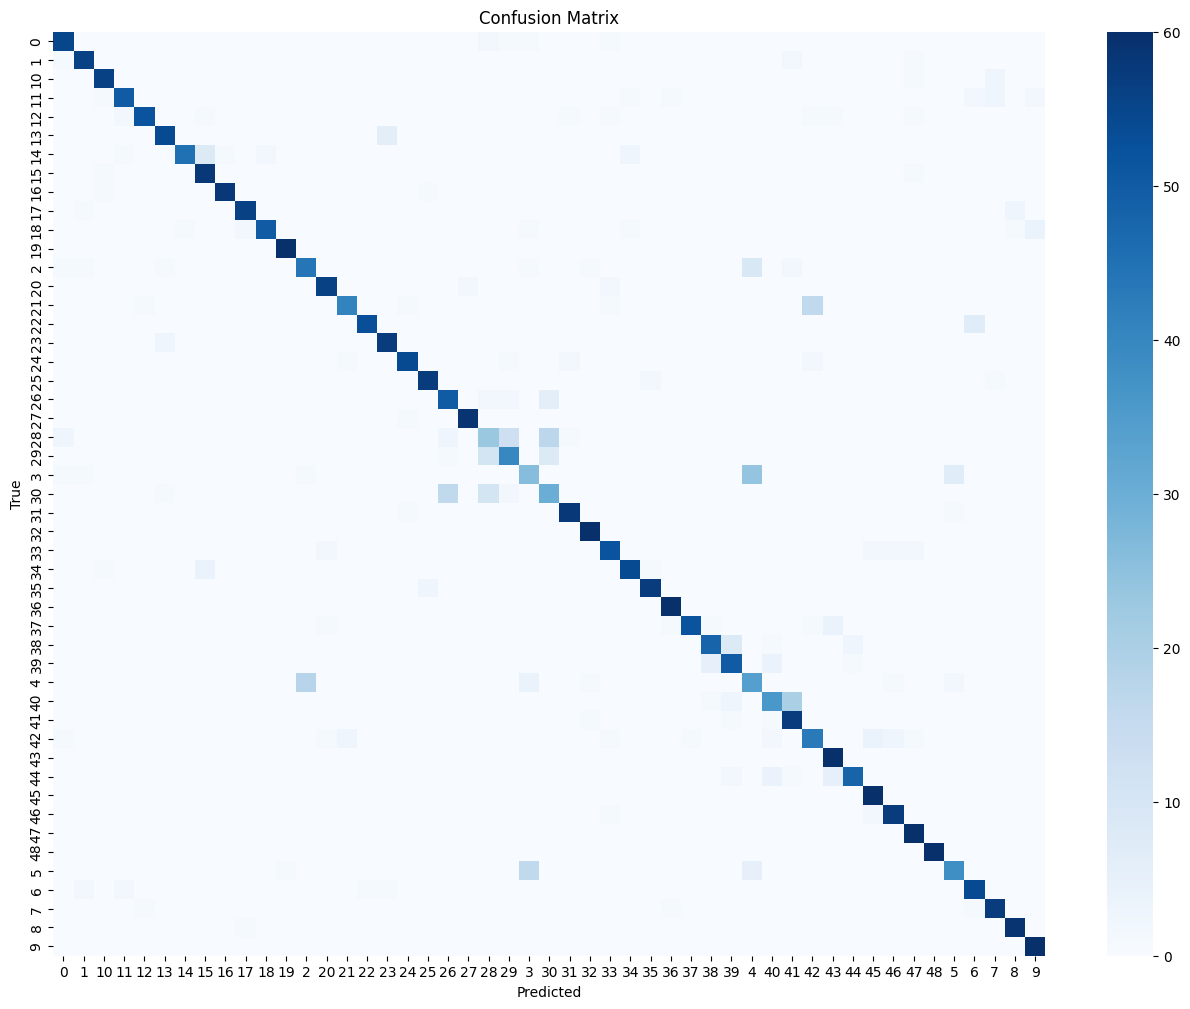

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(16, 12))
sns.heatmap(cm, xticklabels=class_labels, yticklabels=class_labels, 
            annot=False, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### PART 3: Real-Time Testing with Webcam

In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.imagenet_utils import preprocess_input

# Load models
detection_model = YOLO('runs/detect/train7/weights/best.pt')
recognition_model = load_model('models/recognition_model_mobilenetv2 - Test Loss 0.4178 - Test Accuracy 0.8551.keras')

img_size = 224
class_names = [str(i) for i in range(49)]

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret: break

    results = detection_model(frame)[0]
    boxes = results.boxes.xyxy.cpu().numpy()

    for box in boxes:
        x1, y1, x2, y2 = map(int, box)
        cropped = frame[y1:y2, x1:x2]
        resized = cv2.resize(cropped, (img_size, img_size))
        normed = preprocess_input(resized.astype(np.float32))
        pred = recognition_model.predict(np.expand_dims(normed, axis=0))[0]
        label = class_names[np.argmax(pred)]

        cv2.rectangle(frame, (x1, y1), (x2, y2), (0,255,0), 2)
        cv2.putText(frame, f'Sign: {label}', (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,0), 2)

    cv2.imshow('Bangla Sign Language Detection & Recognition', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'): break

cap.release()
cv2.destroyAllWindows()


Detected Classes: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '5', '6', '7', '8', '9']


In [7]:
import cv2
import numpy as np
import os
from ultralytics import YOLO
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load models
detection_model = YOLO('runs/detect/train7/weights/best.pt')
recognition_model = load_model('models/recognition_model_mobilenetv2 - Test Loss 0.4178 - Test Accuracy 0.8551.keras')

img_size = 224
#class_names = [str(i) for i in range(49)]
train_dir = 'dataset/Recognition/train'
class_names = os.listdir(train_dir) 

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret: break

    #frame = cv2.flip(frame, 1)  # Optional: mirror effect

    results = detection_model(frame)[0]
    boxes = results.boxes.xyxy.cpu().numpy()

    for box in boxes:
        x1, y1, x2, y2 = map(int, box)
        cropped = frame[y1:y2, x1:x2]

        if cropped.size == 0:
            continue

        resized = cv2.resize(cropped, (img_size, img_size))
        normed = preprocess_input(resized.astype(np.float32))
        pred = recognition_model.predict(np.expand_dims(normed, axis=0), verbose=0)[0]
        label = class_names[np.argmax(pred)]
        confidence = np.max(pred)

        cv2.rectangle(frame, (x1, y1), (x2, y2), (0,255,0), 2)
        cv2.putText(frame, f'Sign: {label} ({confidence:.2f})', (x1, y1-10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,0), 2)

    cv2.imshow('Bangla Sign Language Detection & Recognition', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'): break

cap.release()
cv2.destroyAllWindows()



0: 96x128 (no detections), 15.6ms
Speed: 1.5ms preprocess, 15.6ms inference, 0.4ms postprocess per image at shape (1, 3, 96, 128)

0: 96x128 (no detections), 19.6ms
Speed: 0.3ms preprocess, 19.6ms inference, 0.4ms postprocess per image at shape (1, 3, 96, 128)

0: 96x128 (no detections), 20.2ms
Speed: 0.4ms preprocess, 20.2ms inference, 0.5ms postprocess per image at shape (1, 3, 96, 128)

0: 96x128 (no detections), 17.6ms
Speed: 0.4ms preprocess, 17.6ms inference, 0.4ms postprocess per image at shape (1, 3, 96, 128)

0: 96x128 (no detections), 17.1ms
Speed: 0.4ms preprocess, 17.1ms inference, 0.5ms postprocess per image at shape (1, 3, 96, 128)

0: 96x128 (no detections), 17.4ms
Speed: 0.4ms preprocess, 17.4ms inference, 0.4ms postprocess per image at shape (1, 3, 96, 128)

0: 96x128 (no detections), 16.5ms
Speed: 0.5ms preprocess, 16.5ms inference, 0.5ms postprocess per image at shape (1, 3, 96, 128)

0: 96x128 (no detections), 14.9ms
Speed: 0.5ms preprocess, 14.9ms inference, 0.5ms

### Detection in Multithreading Approach

In [ ]:
import cv2
import numpy as np
import threading
import time
from ultralytics import YOLO
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.imagenet_utils import preprocess_input

# Load models
detection_model = YOLO('runs/detect/train7/weights/best.pt')
recognition_model = load_model('models/recognition_model_convnext - Test Loss 0.4509 - Test Accuracy 0.9803.keras')

img_size = 224
class_names = [str(i) for i in range(49)]

# Shared data between threads
frame = None
result_frame = None
lock = threading.Lock()
running = True

# Detection + recognition thread
def detect_and_recognize():
    global frame, result_frame, running
    while running:
        if frame is not None:
            with lock:
                input_frame = frame.copy()

            # Detection
            results = detection_model(input_frame)[0]
            boxes = results.boxes.xyxy.cpu().numpy()

            for box in boxes:
                x1, y1, x2, y2 = map(int, box)
                cropped = input_frame[y1:y2, x1:x2]

                if cropped.size == 0:  # Skip if box is invalid
                    continue

                try:
                    resized = cv2.resize(cropped, (img_size, img_size))
                    normed = preprocess_input(resized.astype(np.float32))
                    pred = recognition_model.predict(np.expand_dims(normed, axis=0), verbose=0)[0]
                    label = class_names[np.argmax(pred)]

                    cv2.rectangle(input_frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    cv2.putText(input_frame, f'Sign: {label}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
                except Exception as e:
                    print(f"Recognition error: {e}")

            with lock:
                result_frame = input_frame

        time.sleep(0.01)  # Prevent 100% CPU usage

# Start worker thread
worker_thread = threading.Thread(target=detect_and_recognize)
worker_thread.start()

# Main loop to capture and display frames
cap = cv2.VideoCapture(0)
while True:
    ret, frame_raw = cap.read()
    if not ret:
        break

    with lock:
        frame = frame_raw.copy()

    with lock:
        display = result_frame.copy() if result_frame is not None else frame_raw.copy()

    cv2.imshow("Bangla Sign Language Detection & Recognition", display)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        running = False
        break

cap.release()
cv2.destroyAllWindows()
worker_thread.join()




0: 96x128 (no detections), 64.4ms
Speed: 5.7ms preprocess, 64.4ms inference, 4.2ms postprocess per image at shape (1, 3, 96, 128)

0: 96x128 (no detections), 16.1ms
Speed: 0.3ms preprocess, 16.1ms inference, 0.4ms postprocess per image at shape (1, 3, 96, 128)

0: 96x128 (no detections), 17.4ms
Speed: 0.4ms preprocess, 17.4ms inference, 0.4ms postprocess per image at shape (1, 3, 96, 128)

0: 96x128 (no detections), 16.1ms
Speed: 0.3ms preprocess, 16.1ms inference, 0.4ms postprocess per image at shape (1, 3, 96, 128)

0: 96x128 (no detections), 16.1ms
Speed: 0.5ms preprocess, 16.1ms inference, 0.4ms postprocess per image at shape (1, 3, 96, 128)

0: 96x128 (no detections), 17.0ms
Speed: 0.4ms preprocess, 17.0ms inference, 0.4ms postprocess per image at shape (1, 3, 96, 128)

0: 96x128 (no detections), 15.8ms
Speed: 0.5ms preprocess, 15.8ms inference, 0.4ms postprocess per image at shape (1, 3, 96, 128)

0: 96x128 (no detections), 16.2ms
Speed: 0.4ms preprocess, 16.2ms inference, 0.4m

### Detection in Multithreading Approach With Label Mapping

In [15]:
import cv2
import numpy as np
import threading
import time
import os
from ultralytics import YOLO
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from PIL import Image, ImageDraw, ImageFont

# Load models
detection_model = YOLO('runs/detect/train7/weights/best.pt')
recognition_model = load_model('models/recognition_model_convnext - Test Loss 0.4509 - Test Accuracy 0.9803.keras')

img_size = 224
class_names = [str(i) for i in range(49)]

# Class mapping dictionary
class_mapping = {
    0: 0, 1: 1, 2: 10, 3: 11, 4: 12, 5: 13, 6: 14, 7: 15, 8: 16, 9: 17,
    10: 18, 11: 19, 12: 2, 13: 20, 14: 21, 15: 22, 16: 23, 17: 24, 18: 25, 19: 26,
    20: 27, 21: 28, 22: 29, 23: 3, 24: 30, 25: 31, 26: 32, 27: 33, 28: 34, 29: 35,
    30: 36, 31: 37, 32: 38, 33: 39, 34: 4, 35: 40, 36: 41, 37: 42, 38: 43, 39: 44,
    40: 45, 41: 46, 42: 47, 43: 48, 44: 5, 45: 6, 46: 7, 47: 8, 48: 9
}

bangla_mapping = {
    0: "অ", 1: "আ", 2: "ই", 3: "উ", 4: "এ", 5: "ও", 6: "ক", 7: "খ", 8: "গ", 9: "ঘ",
    10: "চ", 11: "ছ", 12: "জ", 13: "ঝ", 14: "ট", 15: "ঠ", 16: "ড", 17: "ঢ", 18: "ত",
    19: "থ", 20: "দ", 21: "ধ", 22: "প", 23: "ফ", 24: "ব", 25: "ভ", 26: "ম", 27: "য়",
    28: "র", 29: "ল", 30: "ন", 31: "স", 32: "হ", 33: "ড়", 34: "ং", 35: "ঃ", 36: "০",
    37: "১", 38: "২", 39: "৩", 40: "৪", 41: "৫", 42: "৬", 43: "৭", 44: "৮", 45: "৯",
    46: "্‌", 47: " ", 48: "ঞ"
}

# Load Bangla font for Pillow
font_path = 'NotoSansBengali-Regular.ttf'  # Update with your font path
if not os.path.exists(font_path):
    print(f"Font file {font_path} not found. Please install Noto Sans Bengali or update the font path.")
    font = ImageFont.load_default()  # Fallback to default font (won't support Bangla)
else:
    try:
        font = ImageFont.truetype(font_path, size=36)  # Increased font size for visibility
        print(f"Successfully loaded font: {font_path}")
    except Exception as e:
        print(f"Error loading font: {e}. Please ensure NotoSansBengali-Regular.ttf is installed.")
        font = ImageFont.load_default()  # Fallback to default font (won't support Bangla)

# Shared data between threads
frame = None
result_frame = None
lock = threading.Lock()
running = True

# Function to overlay Bangla text on OpenCV frame using Pillow
def put_bangla_text(frame, text, position, font, color=(0, 255, 0)):
    # Convert OpenCV frame (BGR) to PIL Image (RGB)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pil_img = Image.fromarray(frame_rgb)
    draw = ImageDraw.Draw(pil_img)
    
    # Draw text
    draw.text(position, text, font=font, fill=color)
    
    # Convert back to OpenCV format (BGR)
    frame_bgr = cv2.cvtColor(np.array(pil_img), cv2.COLOR_RGB2BGR)
    return frame_bgr

# Detection + recognition thread
def detect_and_recognize():
    global frame, result_frame, running
    while running:
        if frame is not None:
            with lock:
                input_frame = frame.copy()

            # Detection
            results = detection_model(input_frame)[0]
            boxes = results.boxes.xyxy.cpu().numpy()

            for box in boxes:
                x1, y1, x2, y2 = map(int, box)
                cropped = input_frame[y1:y2, x1:x2]

                if cropped.size == 0:  # Skip if box is invalid
                    continue

                try:
                    resized = cv2.resize(cropped, (img_size, img_size))
                    normed = preprocess_input(resized.astype(np.float32))
                    pred = recognition_model.predict(np.expand_dims(normed, axis=0), verbose=0)[0]
                    predicted_label = int(class_names[np.argmax(pred)])  # Get predicted class index
                    mapped_label = class_mapping[predicted_label]  # Map to new label
                    bangla_label = bangla_mapping[mapped_label]  # Get Bangla character

                    # Debug: Print the labels to verify
                    print(f"Predicted: {predicted_label}, Mapped: {mapped_label}, Bangla: {bangla_label}")

                    # Draw rectangle
                    cv2.rectangle(input_frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    
                    # Overlay Bangla text using Pillow
                    input_frame = put_bangla_text(input_frame, f'Sign: {bangla_label}', (x1, y1 - 40), font, color=(0, 255, 0))

                except Exception as e:
                    print(f"Recognition error: {e}")

            with lock:
                result_frame = input_frame

        time.sleep(0.01)  # Prevent 100% CPU usage

# Start worker thread
worker_thread = threading.Thread(target=detect_and_recognize)
worker_thread.start()

# Main loop to capture and display frames
cap = cv2.VideoCapture(0)
while True:
    ret, frame_raw = cap.read()
    if not ret:
        break

    with lock:
        frame = frame_raw.copy()

    with lock:
        display = result_frame.copy() if result_frame is not None else frame_raw.copy()

    cv2.imshow("Bangla Sign Language Detection & Recognition", display)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        running = False
        break

cap.release()
cv2.destroyAllWindows()
worker_thread.join()

Successfully loaded font: NotoSansBengali-Regular.ttf

0: 96x128 (no detections), 16.5ms
Speed: 2.4ms preprocess, 16.5ms inference, 0.5ms postprocess per image at shape (1, 3, 96, 128)

0: 96x128 (no detections), 17.0ms
Speed: 0.4ms preprocess, 17.0ms inference, 0.5ms postprocess per image at shape (1, 3, 96, 128)

0: 96x128 (no detections), 17.5ms
Speed: 0.4ms preprocess, 17.5ms inference, 0.6ms postprocess per image at shape (1, 3, 96, 128)

0: 96x128 (no detections), 19.3ms
Speed: 0.6ms preprocess, 19.3ms inference, 0.4ms postprocess per image at shape (1, 3, 96, 128)

0: 96x128 (no detections), 19.5ms
Speed: 0.5ms preprocess, 19.5ms inference, 0.5ms postprocess per image at shape (1, 3, 96, 128)

0: 96x128 (no detections), 18.7ms
Speed: 0.5ms preprocess, 18.7ms inference, 0.5ms postprocess per image at shape (1, 3, 96, 128)

0: 96x128 (no detections), 17.0ms
Speed: 1.1ms preprocess, 17.0ms inference, 0.4ms postprocess per image at shape (1, 3, 96, 128)

0: 96x128 (no detections), 1

### Random Sample Data

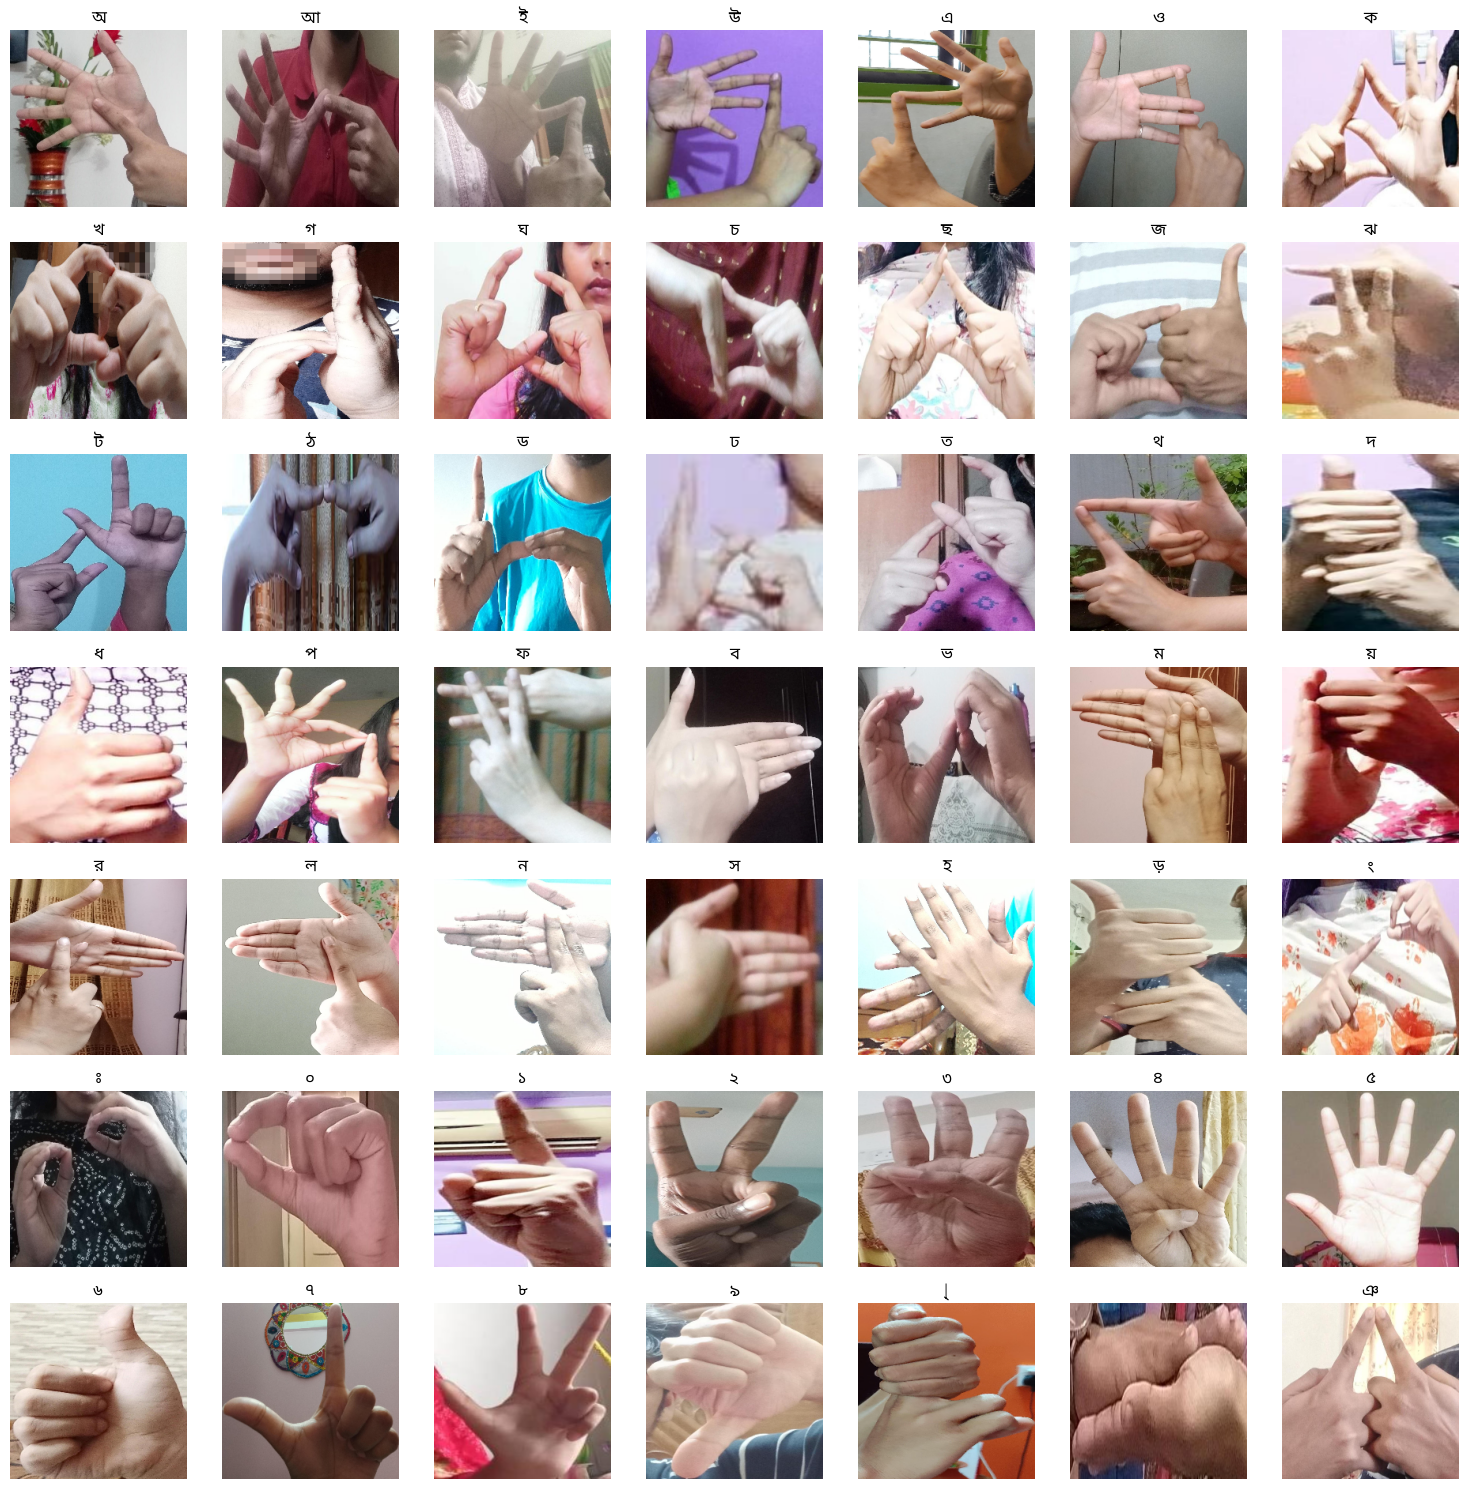

In [11]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Configuration
train_dir = 'dataset/Recognition/train'
img_size = 224
class_names = [str(i) for i in range(49)]

# Class mapping dictionary
class_mapping = {
    0: 0, 1: 1, 2: 10, 3: 11, 4: 12, 5: 13, 6: 14, 7: 15, 8: 16, 9: 17,
    10: 18, 11: 19, 12: 2, 13: 20, 14: 21, 15: 22, 16: 23, 17: 24, 18: 25, 19: 26,
    20: 27, 21: 28, 22: 29, 23: 3, 24: 30, 25: 31, 26: 32, 27: 33, 28: 34, 29: 35,
    30: 36, 31: 37, 32: 38, 33: 39, 34: 4, 35: 40, 36: 41, 37: 42, 38: 43, 39: 44,
    40: 45, 41: 46, 42: 47, 43: 48, 44: 5, 45: 6, 46: 7, 47: 8, 48: 9
}

bangla_mapping = {
    0: "অ", 1: "আ", 2: "ই", 3: "উ", 4: "এ", 5: "ও", 6: "ক", 7: "খ", 8: "গ", 9: "ঘ",
    10: "চ", 11: "ছ", 12: "জ", 13: "ঝ", 14: "ট", 15: "ঠ", 16: "ড", 17: "ঢ", 18: "ত",
    19: "থ", 20: "দ", 21: "ধ", 22: "প", 23: "ফ", 24: "ব", 25: "ভ", 26: "ম", 27: "য়",
    28: "র", 29: "ল", 30: "ন", 31: "স", 32: "হ", 33: "ড়", 34: "ং", 35: "ঃ", 36: "০",
    37: "১", 38: "২", 39: "৩", 40: "৪", 41: "৫", 42: "৬", 43: "৭", 44: "৮", 45: "৯",
    46: "্‌", 47: " ", 48: "ঞ"
}

# Set Bangla font for Matplotlib
try:
    # Add Noto Sans Bengali or another Bangla font (update path if needed)
    font_path = 'NotoSansBengali-Regular.ttf'  # Update with your font path
    if not os.path.exists(font_path):
        print(f"Font file {font_path} not found. Please install a Bangla font (e.g., Noto Sans Bengali).")
        font_path = None
    else:
        font_manager.fontManager.addfont(font_path)
        prop = font_manager.FontProperties(fname=font_path)
        plt.rcParams['font.family'] = prop.get_name()
except Exception as e:
    print(f"Error setting font: {e}. Falling back to default font.")
    plt.rcParams['font.family'] = 'sans-serif'

# Function to load one random image per class
def load_random_images():
    images = []
    labels = []
    for class_idx in range(49):
        class_dir = os.path.join(train_dir, str(class_idx))
        if not os.path.exists(class_dir):
            print(f"Directory {class_dir} does not exist")
            images.append(np.zeros((img_size, img_size, 3), dtype=np.uint8))  # Placeholder for missing class
            labels.append(class_idx)
            continue
        image_files = [f for f in os.listdir(class_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
        if not image_files:
            print(f"No images found in {class_dir}")
            images.append(np.zeros((img_size, img_size, 3), dtype=np.uint8))  # Placeholder for empty class
            labels.append(class_idx)
            continue
        random_image = random.choice(image_files)
        img_path = os.path.join(class_dir, random_image)
        img = cv2.imread(img_path)
        if img is None:
            print(f"Failed to load image {img_path}")
            images.append(np.zeros((img_size, img_size, 3), dtype=np.uint8))  # Placeholder for invalid image
            labels.append(class_idx)
            continue
        img = cv2.resize(img, (img_size, img_size))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib
        images.append(img)
        labels.append(class_idx)
    return images, labels

# Load images and labels
images, labels = load_random_images()

# Print mapped labels serially with Bangla characters
#print("Mapped Labels (Serially):")
#for class_idx in range(49):
#    mapped_label = class_mapping[class_idx]
#    bangla_label = bangla_mapping[mapped_label]
#    print(f"Class {class_idx}: Mapped Label {mapped_label} ({bangla_label})")

# Create a 7x7 grid for 49 classes
fig, axes = plt.subplots(7, 7, figsize=(15, 15))
axes = axes.ravel()

for i, (img, label) in enumerate(zip(images, labels)):
    axes[i].imshow(img)
    mapped_label = class_mapping[label]
    bangla_label = bangla_mapping[label]
    axes[i].set_title(f"{bangla_label}")
    axes[i].axis('off')

plt.tight_layout()
plt.savefig('class_image_grid_bangla.png')
plt.show()

### Code for Manual Testing (Single Image from File)

In [10]:
import cv2
import numpy as np
from ultralytics import YOLO
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tkinter import filedialog, Tk

# Load models
detection_model = YOLO('runs/detect/train7/weights/best.pt')
recognition_model = load_model('recognition_model_convnext.keras')

img_size = 224
class_names = [str(i) for i in range(49)]

# File dialog to select image
Tk().withdraw()  # Hide the root window
image_path = filedialog.askopenfilename(title="Select an image", filetypes=[("Image Files", "*.jpg *.png *.jpeg")])

if not image_path:
    print("No image selected.")
    exit()

# Load image
frame = cv2.imread(image_path)
if frame is None:
    print("Failed to load image.")
    exit()

frame = cv2.resize(frame, (640, 480))  # Resize for better processing

# Detection
results = detection_model(frame)[0]
boxes = results.boxes.xyxy.cpu().numpy()

# Recognition
for box in boxes:
    x1, y1, x2, y2 = map(int, box)
    cropped = frame[y1:y2, x1:x2]

    if cropped.size == 0:
        continue

    try:
        resized = cv2.resize(cropped, (img_size, img_size))
        normed = preprocess_input(resized.astype(np.float32))
        pred = recognition_model.predict(np.expand_dims(normed, axis=0), verbose=0)[0]
        label = class_names[np.argmax(pred)]

        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, f'Sign: {label}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
    except Exception as e:
        print(f"Recognition error: {e}")
    
# Display result
cv2.imshow("Bangla Sign Language Recognition", frame)
cv2.waitKey(0)
cv2.destroyAllWindows()



0: 96x128 1 49, 15.1ms
Speed: 1.5ms preprocess, 15.1ms inference, 0.8ms postprocess per image at shape (1, 3, 96, 128)
